# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 9</span>

## 09.1
L'esercizio richiede di risolvere il problema del commesso viaggiatore utilizzando un algoritmo genetico. Gli algoritmi genetici sono procedure usate per risolvere problemi di ottimizzazione e sfruttano i meccanismi della selezione naturale e della genetica. Questo problema in particolare chiede di minimizzare il percorso totale di un commesso viaggiatore che deve visitare un set di $N=32$ città con posizioni $\vec{c}_i$, ritornando alla città di partenza e passando una volta soltanto in ogni città.

Ho implementato la *popolazione* come un vettore di traiettorie che il commesso può effettuare (in questo esercizio mi sono servita della classe *vector* appartenente alla *standard template library*). In particolare ho deciso di creare una classe *Individuo*, che rappresenta uno dei possibili percorsi che può effettuare il commesso fra le città. Essa contiene un vettore di interi (gli indici rappresentanti le città) e nella costruzione della classe il vettore viene riempito e rimescolato per generare il percorso casuale. Ho aggiunto anche una funzione *check* fra i metodi della classe per verificare che i percorsi creati rispettassero i vincoli del problema: ogni città è visitata una volta e ogni percorso parte dalla stessa città. Un altro membro della classe *Individuo* è la lunghezza del percorso, che rappresenta la funzione costo di questo problema di ottimizzazione e viene definita come:
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|\ ,
$$
in cui le $\vec{x}_i$ rappresentano le coordinate delle città.

Ho costruito l'algoritmo genetico implementando degli operatori di mutazione e un operatore di *crossover*. Ho scritto $4$ operatori di mutazione:
- *pair mutation*, seleziono in modo casuale due elementi del percorso e li scambio;
- *shift*, seleziono in modo casuale una posizione nel percorso e, utilizzando la funzione *rotate* della classe *vector*, ruoto gli elementi contigui di un determinato range.
- *permutation*, seleziono due posizioni e una lunghezza e vado a scambiare fra la prima posizione e la seconda tanti elementi quanto è grande la lunghezza. In questo modo riesco a permutare un numero di elementi contigui.
- *inversion*, seleziono in modo casuale due estremi e vado a invertire l'ordine degli elementi contenuti all'interno.

Alla fine di ogni mutazione ho aggiunto una funzione che verificasse che l'azione svolta fosse veramente una permutazione del vettore precedente. Le mutazioni in un algoritmo genetico vanno implementate con una probabilità molto bassa poichè nel modificare così gli individui, c'è la possibilità di allontanarsi dal minimo del problema.

Ho implementato poi l'algoritmo per il *crossover*. Ho scritto una funzione che prendesse in ingresso due classi *Individuo* su cui scrivere i figli prodotti e un vettore popolazione da cui estrarre il padre e la madre. Per l'estrazione del padre e della madre ho implementato una funzione *selection*. Essa permette di estrarre dalla popolazione un individuo con una probabilità inversamente proporzionale alla sua lunghezza e così sono più probabili gli individui con un percorso breve. Ho scritto un vettore di probabilità in cui ogni indice rappresenta un elemento del vettore *popolazione* e le cui componenti sono $p_i = \frac{1}{lunghezza_i}$. Ho normalizzato dividendo per la sommma di tutte le probabilità. La selezione funziona quindi in questo modo: estraggo un numero nell'intervallo unitario, valuto in quale intervallo delle componenti del vettore va a cadere ed estraggo quel determinato indice. Una volta selezionati un padre e una madre ho implementato il *crossover*. Ho generato un numero casuale entro le $N$ città per decidere dove tagliare l'individuo e ho settato nei nuovi figli i primi geni del padre e della madre in ordine come appaiono. Per completare il riempimento degli individui figli mi sono servita di una classe, che ho chiamato *Gene*, i cui membri privati sono un intero che caratterizza il gene e un altro che ne caratterizza la posizione. Sfruttando dei *vector* di questa classe ho potuto memorizzare i geni mancanti del padre (o della madre) nell'ordine in cui appaiono nella madre (o nel padre). In seguito li ho inseriti all'interno dei figli nelle posizioni ancora da riempire. Il *crossover* non avviene sempre, anche se la probabilità con cui può partire è settata a un numero alto. Qualora non avvenisse, ho scritto i figli uguali al padre e alla madre.

Una volta prodotti i due individui figli sono andata a sostituirli ai peggiori della popolazione. La nuova popolazione così ottenuta appartiene a una nuova generazione. Ho aggiunto anche una funzione che, con una bassa probabilità, implementasse l'inserimento dell'elitario, ovvero l'individuo migliore della popolazione, nella generazione successiva al posto dell'individuo peggiore della popolazione.

Il mio codice legge da un file di *input* le probabilità di mutazione e dell'elitario, che ho settato a $0.05$, la probabilità di fare *crossover*, che invece ho posto $0.7$, il numero di generazioni pari a $3000$ e una variabile *forma*. Se tale variabile è settata a $0$, allora il codice genera le città distribuite all'interno di un quadrato, mentre se settata a $1$ genera città su una circonferenza. In *input* ho aggiunto anche la lettura di una variabile $R$ che permette di cambiare la dimensione del raggio del cerchio o del lato del quadrato.

Lette le variabili di *input* che impostano il problema, la popolazione viene inizializzata e viene anche verificato che ogni individuo rispetti i vincoli del problema. Il codice calcola allora la lunghezza di ogni individuo e ordina la popolazione dal percorso più breve a quello più lungo. Tramite un ciclo inizia a produrre le nuove generazioni, prima facendo *crossover* e poi facendo, con bassa probabilità, una delle mutazioni su un individuo selezionato in modo casuale. Successivamente ho calcolato di nuovo la lunghezza della popolazione e l'ho ordinata e ho eventualmente inserito l'elitario. Prima di passare alla generazione successiva ho fatto stampare su un file la lunghezza migliore di quella generazione e la media aritmetica sulla prima metà, che costituisce la metà degli individui migliori.
Ho eseguito $3000$ generazioni poichè ho osservato che la funzione costo si stabilizzava a un punto minimo.
Ho effettuato questo procedimento sia per le città generate su una circonferenza sia per quelle generate all'interno del quadrato.

Di seguito riporto tre grafici: nel primo vi è per ogni generazione la lunghezza del percorso migliore, nel secondo vi è la media della prima metà in funzione della generazione e nel terzo ho riportato la traiettoria migliore all'ultima generazione.

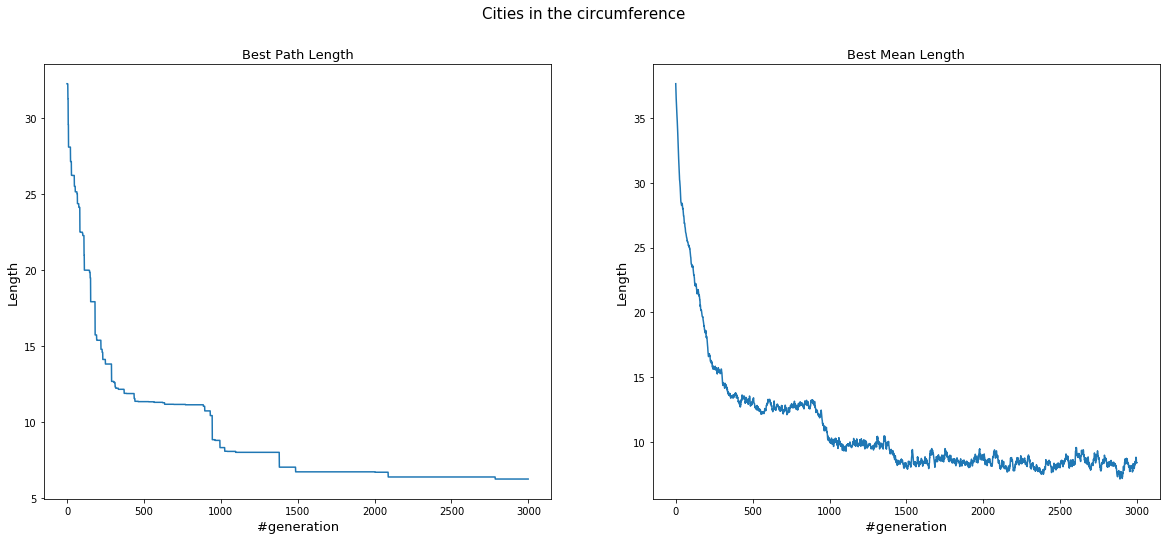

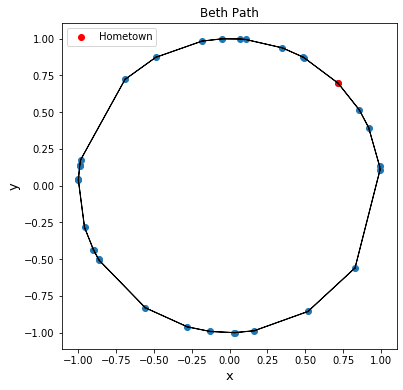

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Cities in the circumference', fontsize=15)

(gen, best_length) = np.loadtxt('output_cerchio_best_length.dat', usecols=(0,1), unpack = True)
axs[0].plot(gen, best_length)
axs[0].set_title('Best Path Length', fontsize=13)

(gen, mean_length) = np.loadtxt('output_cerchio_mean_length.dat', usecols=(0,1), unpack = True)
axs[1].plot(gen, mean_length)
axs[1].set_title('Best Mean Length', fontsize=13)

for ax in axs.flat:
    ax.set_xlabel('#generation', fontsize=13)
    ax.set_ylabel('Length', fontsize=13)
    
plt.figure(figsize=(6,6))
(x, y) = np.loadtxt('output_cerchio_best_path.dat', usecols=(0,1), unpack = True)

for i in range(0, 31):
    plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i])
    
plt.arrow(x[31], y[31], x[0]-x[31], y[0]-y[31])
plt.scatter(x, y)    
plt.scatter(x[0], y[0], color='red', label="Hometown")
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.legend(loc=2)
plt.title("Beth Path")
plt.show()

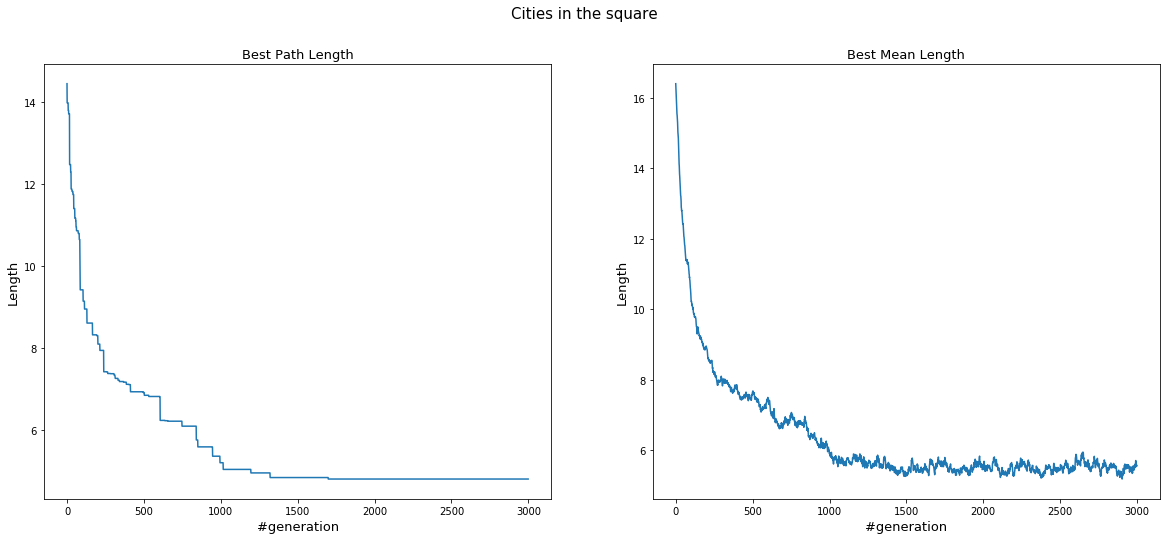

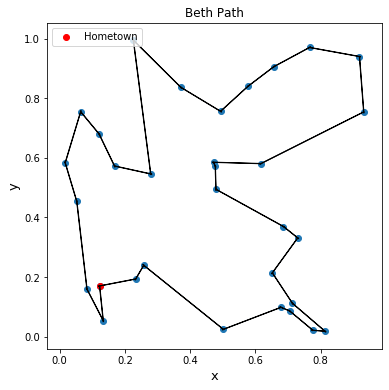

In [3]:

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Cities in the square', fontsize=15)

(gen, best_length) = np.loadtxt('output_quadrato_best_length.dat', usecols=(0,1), unpack = True)
axs[0].plot(gen, best_length)
axs[0].set_title('Best Path Length', fontsize=13)

(gen, mean_length) = np.loadtxt('output_quadrato_mean_length.dat', usecols=(0,1), unpack = True)
axs[1].plot(gen, mean_length)
axs[1].set_title('Best Mean Length', fontsize=13)

for ax in axs.flat:
    ax.set_xlabel('#generation', fontsize=13)
    ax.set_ylabel('Length', fontsize=13)
    
plt.figure(figsize=(6,6))
(x, y) = np.loadtxt('output_quadrato_best_path.dat', usecols=(0,1), unpack = True)

for i in range(0, 31):
    plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i])
    
plt.arrow(x[31], y[31], x[0]-x[31], y[0]-y[31])
plt.scatter(x, y)    
plt.scatter(x[0], y[0], color='red', label="Hometown")
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.legend(loc=2)
plt.title("Beth Path")
plt.show()